Hello! This Python Notebook is constituted of some of the homework problems that I did for MATH 661, which I took as a Junior. I had only completed COMP 110 and COMP 401 prior to taking this course, and was enrolled in COMP 410 and COMP 411 while taking this course. This was my first experience programming in Python, and was my first time doing any sort of mathematical programming. The purpose of this Notebook is to give some idea of my competence in Mathemtics, particularly in the areas of Linear Algebra and Calculus.

The Problems That I have included in this Notebook demonstrate competency in the following concepts:

Infinite Dimensional Vector Spaces, Inner Products in Infinite Dimensional vector spaces, and the notion of ortogonality in Infinite Dimensional Vector Spaces.

Best Functional Approximation (Continuous Least Squares Regression)

Fourier Decomposition (A special case of Best Functional Approximation with periodicity and trigonometric standard basis functions)

Multivariable Numerical Integration via Gaussian Quadrature, and an understanding of the Legendre Polynomials

Basic numerical techniques for solving Systems of ODEs

In order to find the second degree polynomial $q_2(t) $ that approximates $ g(t) = sin(\pi t) $ by minimizing $ \int_0^1[g(t) - q_2(t)dt] $ we will start by stating the $L_2$ norm or inner product as $<f(t),g(t)> := \int_0^1(f(t)g(t)dt $  

We will start with a monomial basis that serves as a basis for $P_2 $ space, namely, $\phi_0(t) = 1 $ , $\phi_1(t) = t $, $\phi_2(t) = t^2 $, using Graham-Schmidt Orthonormalization to generate a set of orthogonal basis functions for this same space. We will then take the orthogonal projection of $ g(t) = sin(\pi t) $ onto this space, with the inner product being as stated, and this will give us the polynomial that best appoximates this function on this interval.

$\phi_0(t) = 1 $ , $\phi_1(t) = t $, $\phi_2(t) = t^2 $

$\psi_0(t) = \phi_0(t) = 1 $

$\psi_1(t) = \phi_1(t) - \frac{<\phi_1(t), \psi_0(t)>}{<\psi_0(t), \psi_0(t)>}\psi_0(t) $
$\psi_1(t) = t - \frac{\int_0^1tdt}{\int_0^11dt}(1) = t - \frac{1}{2} $

$\psi_2(t) = \phi_2(t) - \frac{<\phi_2(t), \psi_1(t)>}{<\psi_1(t), \psi_1(t)>}\psi_1(t) - \frac{<\phi_2(t), \psi_0(t)>}{<\psi_0(t), \psi_0(t)>}\psi_0(t) $

$\psi_2(t) = t^2 - \frac{\int_0^1(t^3 - \frac{1}{2}t)dt}{\int_0^1(t-\frac{1}{2})^2dt} *(t-\frac{1}{2}) - \frac{\int_0^1t^2dt}{\int_0^1dt}*(1) $

$\psi_2(t) = t^2 - t + \frac{1}{6} $

Because the problem gives us integral evaluations, I will be rescaling all of my polynomials in order to match the books- I can do this because scaling will not change orthogonality.

$\psi_0(t) = 1 $
$\psi_1(t) = 2t - 1 $
$\psi_2(t) = 6t^2 - 6t - 1 $

All thats left to do is evaluate the following:

$ q_2(t) = \frac{<sin(\pi t), \psi_0>}{<\psi_0, \psi_0>}*\psi_0 + \frac{<sin(\pi) t, \psi_1>}{<\psi_1, \psi_1>}*\psi_1 + \frac{<sin(\pi t), \psi_2>}{<\psi_2, \psi_2>}*\psi_2 $

$q_2(t) = \frac{\int_0^1(sin(\pi t) dt}{\int_0^1dt} * (1) + \frac{\int_0^1(2t - 1)sin(\pi t)dt}{\int_0^1(2t-1)^2dt}*(2t+1) + \frac{\int_0^1(6t^2-6t+1)sin(\pi t)dt}{\int_0^1(6t^2-6t+1)^2dt} * (6t^2-6t+1) $

Evalution of this expression yields

$q_2(t) = \frac{2}{\pi}*(1) + 0 * (2t-1) + \frac{\frac{2(\pi^2 - 12)}{\pi^3}}{\frac{1}{5}} * (6t^2-6t+1)$ 

$q_2(t) = \frac{60\pi^2 - 720}{\pi^3}t^2 + \frac{720 - 60\pi^2}{\pi^3}t + \frac{12\pi^2 - 120}{\pi^3} $

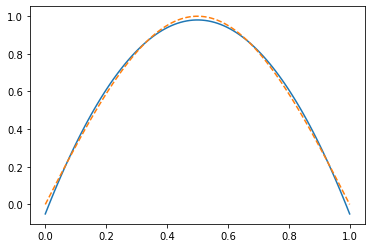

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, abs, sin

def q2(x):
    return ((60*np.pi**2.0 - 720)/(np.pi**3.0))*x**2.0 + ((720 - 60*np.pi**2.0)/(np.pi**3.0))*x + ((12*np.pi**2.0 - 120) / (np.pi**3.0));

x = np.linspace(0, 1, 100, endpoint = True);

plt.plot(x, q2(x), "-", x, sin(np.pi*x), "--");
plt.show();


Problem 1: Verify that the trigonometric polynomial functions form an orthogonal basis, and find their normalizing constants, i.e., find $ \int_{-\pi}^\pi cos(kx)^2dx $ and $ \int_{-\pi}^\pi sin(kx)^2dx $


In order to show that these basis functions are orthogonal, we need to consider them under the norm defined. I will be using the
$ L_2 $ norm defined as $ <f,g> = \int_{-\pi}^\pi f(x)g(x)dx $

I will list the trigonometric Identities that I will be using to show these calculations below:

A) $ sin(m)sin(n) = \frac{1}{2}[cos(m-n) - cos(m+n)] $

B) $ cos(m)cos(n) = \frac{1}{2}[cos(m-n) + cos(m+n)] $

C) $ sin(m)cos(n) = \frac{1}{2}[sin(m-n) + sin(m+n)] $

In order to show orthogonality of these basis functions I will need to show three things listed directly below:
For the rest of my calculations, I am operating under the assumption that m and n are positive integers
To show orthogonality of basis functions I will show:

1) $ \int_{-\pi}^\pi cos(mx)cos(nx)dx = 0 $ for $ m \neq n $

2) $ \int_{-\pi}^\pi sin(mx)sin(nx)dx = 0 $ for $ m \neq n $

3) $ \int_{-\pi}^\pi cos(mx)sin(nx)dx = 0 $ for all m,n 

I will start with equation 1), and proceed without loss of generality for equation 2). Meaning the exact same steps I go through to prove equation 1) can be used to prove equation 2): let m and n be positive integers that are not equal to each other, then:

$ \int_{-\pi}^\pi cos(mx)cos(nx)dx = \int_{-\pi}^\pi \frac{1}{2}[cos(mx-nx) + cos(mx+nx)]dx $ by trigonometric identity B)

$ = \int_{-\pi}^\pi \frac{1}{2}[cos((m-n)x) + cos((m+n)x)]dx $

$ = \frac{1}{2}*[\frac{sin((m-n)x)}{m-n} + \frac{sin((m+n)x)}{m+n}\big|_{-\pi}^{\pi} $

$ = \frac{1}{2}*[\frac{sin((m-n)\pi)}{m-n} + \frac{sin((m+n)\pi)}{m+n} -\frac{sin((m-n)-\pi)}{m-n}-\frac{sin((m+n)-\pi)}{m+n}]$

because we know that m and n are positive integers and are not equal to each other, we know that m-n and m+n are non-zero integers. Becaues this is the case, all of the terms of the above equation evaluate to 0, because $ sin(k\pi) = 0 $ for any integer k

So we have
$ \int_{-\pi}^\pi cos(mx)cos(nx)dx = 0 $ for $ m \neq n$

The same exact thing can be shown for the 2) equations, this was what I meant by Without Loss of Generality. I can do this because of the trigiometric Idenditites A) and B) both relating the two quantities on the left-hand side to the same two quantities on the right hand side, just with a sign difference, which does not matter, because all of the terms eventually go to zero

So we also have
$ \int_{-\pi}^\pi sin(mx)sin(nx)dx = 0 $ for $ m \neq n $

In order to show equation 3) I will let m and n be positive integers, and use Trigonometric Identity C):

$ \int_{-\pi}^\pi cos(mx)sin(nx)dx = \int_{-\pi}^\pi \frac{1}{2}[sin((m-n)x) + sin((m+n)x)]dx $
$ = [\frac{1}{2}*[\frac{-cos((m-n)x)}{m-n} + \frac{-cos((m+n)x)}{m+n}]\big|_{-\pi}^{\pi} $

$ = \frac{1}{2} *\big[\frac{-cos((m-n)\pi)}{m-n} + \frac{-cos((m+n)\pi)}{m+n} - \frac{-cos((m-n)-\pi)}{m-n} -  \frac{-cos((m+n)-\pi)}{m+n}\big] $
because cos(x) is an even function, cos(-x) = cos(x), and we are left with

$ = \frac{1}{2} *\big[\frac{-cos((m-n)\pi)}{m-n} + \frac{-cos((m+n)\pi)}{m+n} - \frac{cos((m-n)\pi)}{m-n} -  \frac{cos((m+n)\pi)}{m+n}\big] $

So we can easily see that these terms cancel, and we are left with

$ \int_{-\pi}^\pi cos(mx)sin(nx)dx = 0 $ for all positve integer m,n 

This shows the orthogonality of basis functions for trigonometric interpolation

Now to find their normalizing constants $ \int_{-\pi}^\pi cos(kx)^2dx $ and $ \int_{-\pi}^\pi sin(kx)^2dx $

In order to show this, I will be using the identities 

$ cos(kx)^2 = \frac{1}{2}[1 + cos(2kx)] $ and $ sin(kx)^2 = \frac{1}{2}[1 - cos(2kx)] $ 

$ \int_{-\pi}^\pi cos(kx)^2dx  = \int_{-\pi}^\pi \frac{1}{2}[1 + cos(2kx)]dx = \frac{1}{2}[x + \frac{sin(2kx)}{2k}]_{x=-\pi}^{x=\pi} = \pi$

$ \int_{-\pi}^\pi sin(kx)^2dx =  \int_{-\pi}^\pi \frac{1}{2}[1 - cos(2kx)]dx =  \frac{1}{2}[x - \frac{sin(2kx)}{2k}]_{x=-\pi}^{x=\pi} = \pi$



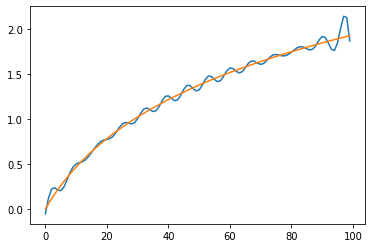

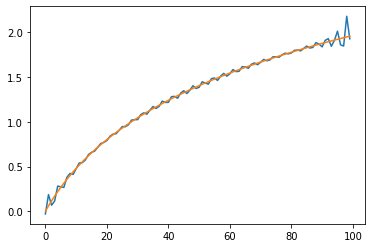

In [2]:
import numpy as np
import scipy as sp
import math
from numpy import sin
from numpy import cos
from matplotlib import pyplot as plt

def func(x):
    return np.log(x+1)

def coeffcalc(l, k):
    ak = 0
    bk = 0
    x = 0
    for i in range (0, 2*l-1):
        bk = bk+func(x)*sin(k*x)
        ak = ak+func(x)*cos(k*x)
        x = x + math.pi/l
    ak = ak/l
    bk = bk/l
    return np.array([ak, bk])

def fourier(l, x):
    summy = 0
    for k in range (1, l-1):
        summy = summy + coeffcalc(l, k)[0]*(cos(k*x))+coeffcalc(l, k)[1]*(sin(k*x))
    return (1/2)*(coeffcalc(l, 0)[0] + coeffcalc(l, l)[0]*cos(l*x)) + summy

plt.figure(1)
pts = np.linspace(0, 2*math.pi - 1/8*math.pi, 100)
approx = fourier(16, pts)
true = func(pts)
plt.plot(approx)
plt.plot(true)
plt.figure(2)
pts = np.linspace(0, 2*math.pi - 1/16*math.pi, 100)
approx = fourier(32, pts)
true = func(pts)
plt.plot(approx)
plt.plot(true)

#The results are poor because the log function does not oscillate. Therefore, approximating it with oscillating 
#functions results in a large error and rapid divergence near the endpoints as the function nears the end of its 
#period and reverts to the value at 0. Also oscillating functions are poor at capturing the slope of the slow but
#steady increase of the log function, and tend to produce "wiggling" errors throughout.

Problem 17



Wolfram Alpha has $\int_0^1\int_0^1(e^{x-y}*sin(x+y))dxdy = 0.8438088680031364 $

For n = 0
$x_0 = 0$, $a_0 = 2 $

So for n = 0, the point that we are evaluating at is (x,y) = (.5,.5) and the corresponding quadrature weight is 1.0

So we can approximate the integral
$$ \int_0^1\int_0^1(e^{x-y}*sin(x+y))dxdy \approx 1.0*f(.5,.5) = 0.8414709848078965 $$


For n = 1, $x_0 = -\sqrt{\frac{1}{3}}$, $x_1 = \sqrt{\frac{1}{3}}$ , $a_0 = 1 = a_1$

$t_0 = \frac{\sqrt{3}-1}{2\sqrt{3}}$, $t_1 = \frac{\sqrt{3}+1}{2\sqrt{3}}$, $b_0 = \frac{1}{2} = b_1$


So for n = 1, we can approximate the integral

$$ \int_0^1\int_0^1(e^{x-y}*sin(x+y))dxdy \approx b_0*b_0*f(t_0,t_0) + b_0*b_1*f(t_0,t_1) + b_0*b_1*f(t_1,t_0) + b_1*b_1*f(t_1,t_1) $$




For n = 2, $x_0 = -\sqrt{\frac{3}{5}}$, $x_1 = 0$, $x_2 = \sqrt{\frac{3}{5}}$ , $a_0 = \frac{5}{9}$, $a_1 = \frac{8}{9}$, $a_2 = \frac{5}{9}$

$t_0 = \frac{\sqrt{5} - \sqrt{3}}{2\sqrt{5}} $ , $ t_1 = \frac{1}{2} $ , and $t_2 = \frac{\sqrt{5} + \sqrt{3}}{2\sqrt{5}} $

$b_0 = \frac{5}{18}$, $b_1 = \frac{4}{9}$, and $b_2 = \frac{5}{18} $

So for n = 2 we can approximate the integral

$$ \int_0^1\int_0^1(e^{x-y}*sin(x+y))dxdy \approx b_0*b_0*f(t_0,t_0) + b_0*b_1*f(t_0,t_1) + b_0*b_2*f(t_0,t_2) + b_1*b_0*f(t_1,t_0) + b_1*b_1*f(t_1,t_1) + b_1*b_2*f(t_1,t_2) + b_2*b_0*f(t_2,t_0) + b_2*b_1*f(t_2,t_1) + b_2*b_2*f(t_2,t_2) $$


In the three cells directly beneath this one, the respective gaussian quadrature approximations have been used to approximate the integral given above. The output is compared to wolfram alpha's answer to the above question, and the absolute error was generated by using that number.

0.8414709848078965
0.002337883195239865


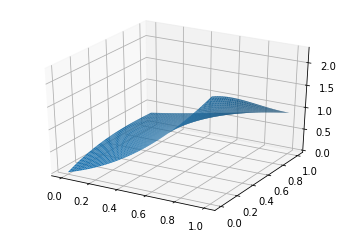

In [3]:
# Problem 17 for n=0
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, sin, cos, abs
from numpy import pi as pi
from mpl_toolkits.mplot3d import Axes3D
a = 0
b = 1
def f(x, y):
    return exp(x-y) * sin(x + y)

def affinet(xj, a, b):
    return ((b-a) / 2.0) * xj + ((b+a) / 2.0)

def affineb(aj, a, b):
    return ((b-a) / 2.0) * aj

n = 0

x0 = 0
a0 = 2

t0 = affinet(x0, 0, 1)
b0 = affineb(a0, 0, 1)


approx = f(t0,t0) * 1.0


actual = 0.8438088680031364
print(approx)
print(abs(approx - actual))


fig = plt.figure()
ax = plt.axes(projection = '3d')
xline = np.linspace(0, 1, 100)
yline = np.linspace(0, 1, 100)

X,Y = np.meshgrid(xline,yline)

ax.plot_surface(X, Y, f(X,Y))
plt.show()


C:\Users\macstark\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


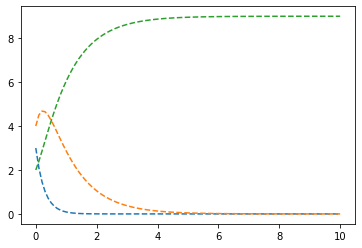

In [4]:
# Code for Problem 7.2
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, abs

def u_prime(u):
    A = np.array([[-3, 0, 0],
                 [3, -1, 0],
                 [0, 1, 0]])
    return A.dot(u)
    

def forward_euler_system(k, t0, tfinal, u0):
    n = 1
    total_steps = round(tfinal / k)
    u = np.zeros((total_steps, 3))
    u[0] = u0
    A = np.array([[-3, 0, 0],
                 [3, -1, 0],
                 [0, 1, 0]])
    while(n*k < tfinal):
        u[n] = u[n-1] + k * A.dot(u[n-1])
        n = n + 1
    return u

k = .1
t0 = 0
tfinal = 10
u0 = np.array([3, 4, 2])
array_length = round(tfinal / k)

x = np.linspace(t0, tfinal, (tfinal-t0) / k)
u = forward_euler_system(k, t0, tfinal, u0)

a = np.zeros(array_length)
b = np.zeros(array_length)
c = np.zeros(array_length)

i = 0
while (i < array_length):
    a[i] = u[i][0]
    b[i] = u[i][1]
    c[i] = u[i][2]
    i = i + 1
plt.plot(x, a, "--", x, b, "--", x, c, "--")
plt.show()

# below is the graph corresponding to the linear kinetic system given in (7.10) 
# here I used K1 = 3, K2 = 1, and u(0) = [3, 4, 2]
# because the step size k = 0.1 that I used in this method is small enough to guaruntee that k*K1 < 2 and k*K2 < 2 at all times,
# the Forward Euler Method is stable
# you will notice that I used the same K1, K2, and u(0) value as in Example 7.9, and the corresponding graph
# on page 159 of the textbook matches my graph exactly